<h1>Research Papers analytics using bag of words model</h1>
<p>In this notebook, we will explore the dataset obtain from crawling research papers</p>

In [1]:
# -*- coding: utf-8 -*-
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit
import codecs
import re
import os
from bs4 import BeautifulSoup # $ pip install beautifulsoup4
from wordcloud import WordCloud
%matplotlib inline

In [2]:
paper_df = pd.read_csv('../dataset/cleaned_papers_pdf.csv',encoding='utf-8')

<h3>Let's see number of paper group by faculty</h3>

In [3]:
paper_df['faculty'].value_counts()

ICT_professor    588
MSME             196
Name: faculty, dtype: int64

<h3>Now number of papers based on professor</h3>

In [4]:
paper_df['name'].value_counts()

Virach Sornlertlamvanich       60
Thanaruk Theeramunkong         48
Somsak Kittipiyakul            42
Bunyarit Uyyanonvara           39
Chalie Charoenlarpnopparut     38
Prapun Suksompong              35
Stanislav S. Makhanov          35
Boontawee Suntisrivaraporn     35
Cholwich Nattee                31
Teerayut Horanont              30
Waree Kongprawechnon           29
Bundit Limmeechokchai          29
Pakinee Aimmanee               23
Supachart Chungpaibulpatana    23
Chung-Hao Hsu                  22
Banlue Srisuchinwong           21
Thananchai Leephakpreeda       21
Ekawit Nantajeewarawat         20
Nguyen Duy Hung                19
Jirachai Buddhakulsomsiri      19
Pisal Yenradee                 19
Sasiporn Usanavasin            18
Navee Chiadamrong              18
Nirattaya Khamsemanan          17
Satha Aphornratana             17
Gun Srijuntongsiri             15
Itthisek Nilkhamhang           14
Toshiaki Kondo                 13
Narameth Nananukul             12
Vladimir I. Ku

In [5]:
#Data sample
print(paper_df.shape)
paper_df.head(10)

(784, 5)


,name,content,directory,isValid,faculty
0,Banlue Srisuchinwong,"Thammasat Int. J. Sc. Tech., Vol.6, No.l, Janu...",../papers/ICT_professor/Banlue Srisuchinwong/1...,True,ICT_professor
1,Banlue Srisuchinwong,___________________________________________0-7...,../papers/ICT_professor/Banlue Srisuchinwong/1...,True,ICT_professor
2,Banlue Srisuchinwong,This paper is a postprint of a paper submitted...,../papers/ICT_professor/Banlue Srisuchinwong/2...,True,ICT_professor
3,Banlue Srisuchinwong,Electronic version of an article published as ...,../papers/ICT_professor/Banlue Srisuchinwong/2...,True,ICT_professor
4,Banlue Srisuchinwong,PhysicsLettersA373(2009)4038–4043 Contentslist...,../papers/ICT_professor/Banlue Srisuchinwong/2...,True,ICT_professor
5,Banlue Srisuchinwong,41UTCC Engineering Research Papers 2008A Low-P...,../papers/ICT_professor/Banlue Srisuchinwong/4...,True,ICT_professor
6,Banlue Srisuchinwong,1Improved Implementation of Sprott™s Chaotic O...,../papers/ICT_professor/Banlue Srisuchinwong/4...,True,ICT_professor
7,Banlue Srisuchinwong,Compound Structures of Six New Chaotic Attract...,../papers/ICT_professor/Banlue Srisuchinwong/5...,True,ICT_professor
8,Banlue Srisuchinwong,Int.J.Electron.Commun.(AEÜ)61(2007)307–313 www...,../papers/ICT_professor/Banlue Srisuchinwong/8...,True,ICT_professor
9,Banlue Srisuchinwong,International Journal of Engineering Research ...,../papers/ICT_professor/Banlue Srisuchinwong/a...,True,ICT_professor


In [6]:
paper_df['isValid'].value_counts()
cleaned_papers_pdf = paper_df

<h3>For the next step, we will cleaned the paper content, then generate a bag of words model</h3>

In [7]:
#Content2Words (or String to words seperate by space)
from nltk.corpus import stopwords # Import the stop word list
from nltk.stem import WordNetLemmatizer

def content_to_words( paper_content ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", paper_content) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))      
    paper_stop = ['cid','fig','however','respectively','used','therefore']
    stops |= set(paper_stop)
    
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops] 
    
    # 5. Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    meaningful_words = [wordnet_lemmatizer.lemmatize(w) for w in meaningful_words if len(w)!=1 or w in['a','i','u']]
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   
words = content_to_words('testing to convert and also cleaning.') 

In [8]:
#Cleaning all of the content csv
start = timeit.default_timer()
cleaned_papers_pdf['cleaned_content'] = cleaned_papers_pdf['content'].apply(content_to_words)
stop = timeit.default_timer()
print("Execution time : "+str(round(stop - start,2))+"s.")    

Execution time : 15.44s.


In [9]:
cleaned_papers_pdf.head(10)

,name,content,directory,isValid,faculty,cleaned_content
0,Banlue Srisuchinwong,"Thammasat Int. J. Sc. Tech., Vol.6, No.l, Janu...",../papers/ICT_professor/Banlue Srisuchinwong/1...,True,ICT_professor,thammasat int sc tech vol january april cmos c...
1,Banlue Srisuchinwong,___________________________________________0-7...,../papers/ICT_professor/Banlue Srisuchinwong/1...,True,ICT_professor,ieee low power low mismatch low glitch class a...
2,Banlue Srisuchinwong,This paper is a postprint of a paper submitted...,../papers/ICT_professor/Banlue Srisuchinwong/2...,True,ICT_professor,paper postprint paper submitted accepted publi...
3,Banlue Srisuchinwong,Electronic version of an article published as ...,../papers/ICT_professor/Banlue Srisuchinwong/2...,True,ICT_professor,electronic version article published journal c...
4,Banlue Srisuchinwong,PhysicsLettersA373(2009)4038–4043 Contentslist...,../papers/ICT_professor/Banlue Srisuchinwong/2...,True,ICT_professor,physicslettersa contentslistsavailableat scien...
5,Banlue Srisuchinwong,41UTCC Engineering Research Papers 2008A Low-P...,../papers/ICT_professor/Banlue Srisuchinwong/4...,True,ICT_professor,utcc engineering research paper low power high...
6,Banlue Srisuchinwong,1Improved Implementation of Sprott™s Chaotic O...,../papers/ICT_professor/Banlue Srisuchinwong/4...,True,ICT_professor,improved implementation sprott chaotic oscilla...
7,Banlue Srisuchinwong,Compound Structures of Six New Chaotic Attract...,../papers/ICT_professor/Banlue Srisuchinwong/5...,True,ICT_professor,compound structure six new chaotic attractor m...
8,Banlue Srisuchinwong,Int.J.Electron.Commun.(AEÜ)61(2007)307–313 www...,../papers/ICT_professor/Banlue Srisuchinwong/8...,True,ICT_professor,int electron commun ae www elsevier de aeue mh...
9,Banlue Srisuchinwong,International Journal of Engineering Research ...,../papers/ICT_professor/Banlue Srisuchinwong/a...,True,ICT_professor,international journal engineering research dev...


In [10]:
#Creating Bags of Words
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 10000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(cleaned_papers_pdf['cleaned_content'])
print("Bag of words created")

Creating the bag of words...

Bag of words created


In [11]:
freqs = [(word, train_data_features.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
#sort from largest to smallest
print(sorted(freqs, key = lambda x: -x[1])[0:40])

[('system', 10539), ('figure', 8363), ('time', 7390), ('model', 6800), ('table', 6489), ('result', 6348), ('method', 6235), ('pp', 6128), ('based', 6047), ('data', 5788), ('value', 5233), ('using', 5115), ('one', 4983), ('number', 4927), ('word', 4646), ('set', 4473), ('two', 4426), ('vol', 4346), ('problem', 4329), ('also', 4298), ('process', 4262), ('energy', 4140), ('case', 4111), ('cost', 4078), ('information', 3780), ('image', 3760), ('algorithm', 3748), ('example', 3633), ('analysis', 3609), ('new', 3568), ('technology', 3480), ('level', 3455), ('function', 3367), ('research', 3358), ('first', 3346), ('different', 3332), ('language', 3306), ('user', 3261), ('study', 3221), ('show', 3197)]


In [12]:
train_data_features.shape

(784, 10000)

In [13]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=450, random_state=42)
reduced_X = svd.fit_transform(train_data_features) 
#reduced_X = svd.fit_transform(tfidf_train_features)

In [14]:
print(svd.explained_variance_ratio_)

[ 0.44735089  0.10872119]


In [15]:
reduced_X[0:10]

array([[ 15.8593619 ,  -1.58712898],
       [ 30.22528428,   3.60306546],
       [ 16.43111881,   0.74846956],
       [ 34.57530115,  -1.73702364],
       [  2.31845608,   0.4614113 ],
       [ 39.63259892,  -2.02217067],
       [ 36.0353369 ,   0.17135927],
       [ 19.80499356,   1.49147907],
       [  5.45324862,   0.53330394],
       [ 21.58301882,   0.99004715]])

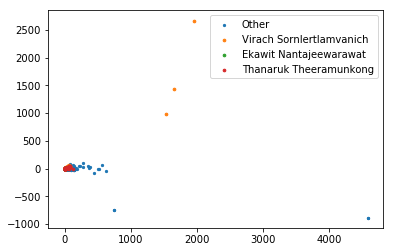

In [16]:
# get the indices where data is 1
def focus_professor(names):
    
    isnOwner = reduced_X[cleaned_papers_pdf['name'].apply(lambda x: x not in names)]
    x,y = isnOwner.T
    plt.scatter(x,y,s=5,label='Other')

    for name in names:
        isOwner = reduced_X[cleaned_papers_pdf['name'].apply(lambda x: name in x)]
        x,y = isOwner.T
        plt.scatter(x,y,s=7,label=name)
    plt.legend()
    plt.show()
focus_professor(['Virach Sornlertlamvanich','Ekawit Nantajeewarawat','Thanaruk Theeramunkong'])

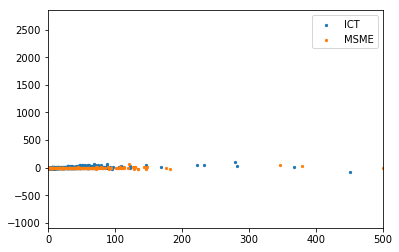

In [17]:
ICT_Professors = reduced_X[cleaned_papers_pdf['faculty']=='ICT_professor'] 
x,y = ICT_Professors.T
plt.scatter(x,y,s=5,label='ICT')
MSME_Professors = reduced_X[cleaned_papers_pdf['faculty']=='MSME']
x,y = MSME_Professors.T
plt.scatter(x,y,s=5,label='MSME')
plt.legend()
plt.xlim((0,500))
plt.show()

In [18]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(train_data_features)
distances_2, indices_2 = nbrs.kneighbors(train_data_features)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:211: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


In [19]:
cleaned_papers_pdf.ix[indices_2[5]] 
#Maybe we will can find duplication from 2-KNN

,name,content,directory,isValid,faculty,cleaned_content
5,Banlue Srisuchinwong,41UTCC Engineering Research Papers 2008A Low-P...,../papers/ICT_professor/Banlue Srisuchinwong/4...,True,ICT_professor,utcc engineering research paper low power high...
18,Banlue Srisuchinwong,Banlue SrisuchinwongDepartment of Electrical E...,../papers/ICT_professor/Banlue Srisuchinwong/N...,True,ICT_professor,banlue srisuchinwongdepartment electrical engi...


In [20]:
cleaned_papers_pdf.ix[indices_2[29]]

,name,content,directory,isValid,faculty,cleaned_content
29,Boontawee Suntisrivaraporn,OnDesirablePropertiesoftheStructural Subsumpti...,../papers/ICT_professor/Boontawee Suntisrivara...,True,ICT_professor,ondesirablepropertiesofthestructural subsumpti...
502,Virach Sornlertlamvanich,ClassiﬁcationofNewsWebDocumentsBasedon Structu...,../papers/ICT_professor/Virach Sornlertlamvani...,True,ICT_professor,classi cationofnewswebdocumentsbasedon structu...


In [21]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(train_data_features)
distances, indices = nbrs.kneighbors(train_data_features)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:211: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


In [22]:
indices

array([[  0, 629, 740, 569, 464],
       [  1,   0,  18,  12,  20],
       [  2,  20,  15, 544,  78],
       ..., 
       [781,  98, 487, 173, 418],
       [782, 492,  78, 627, 721],
       [783, 773, 779, 781, 774]], dtype=int64)

In [23]:
cleaned_papers_pdf.ix[indices[0]]

,name,content,directory,isValid,faculty,cleaned_content
0,Banlue Srisuchinwong,"Thammasat Int. J. Sc. Tech., Vol.6, No.l, Janu...",../papers/ICT_professor/Banlue Srisuchinwong/1...,True,ICT_professor,thammasat int sc tech vol january april cmos c...
629,Chung-Hao Hsu,NASATechnicalMemorandum86325ŁNASA-TM-863251985...,../papers/MSME/Chung-Hao Hsu/19850007753.pdf,True,MSME,nasatechnicalmemorandum nasa tm numericalstudi...
740,Supachart Chungpaibulpatana,Numericalinvestigationofheattransferinpulsatin...,../papers/MSME/Supachart Chungpaibulpatana/559...,True,MSME,numericalinvestigationofheattransferinpulsatin...
569,Waree Kongprawechnon,The2 ndMethodofLiapunovversusFeedbackErrorLear...,../papers/ICT_professor/Waree Kongprawechnon/2...,True,ICT_professor,ndmethodofliapunovversusfeedbackerrorlearningi...
464,Thanaruk Theeramunkong,"(*.(,. 4ˇ ˇ ˇ 6 ˚ ˇ ˇ4 ˆ ˇ ˘ˇ ˙˙˝ ˆ ˆ ˙ˇ ˆˆˆ ˆ...",../papers/ICT_professor/Thanaruk Theeramunkong...,True,ICT_professor,hhi gd afg gd fgc mc gcg mc cg gcg gcg pc time...


In [24]:
#Doing Cluster to 10 group.
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=10, random_state=0).fit(train_data_features)

In [25]:
cleaned_papers_pdf['cluster'] = kmeans.labels_

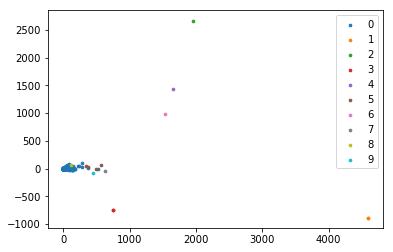

In [26]:
# get the indices where data is 1
def PCA_scatter_plot(seperator='cluster'):
    labels = set(cleaned_papers_pdf[seperator])
    for label in labels:
        isIncluded = reduced_X[cleaned_papers_pdf[seperator].apply(lambda x: x==label)]
        x,y = isIncluded.T
        plt.scatter(x,y,s=7,label=label)
    plt.legend()
    plt.show()
PCA_scatter_plot()

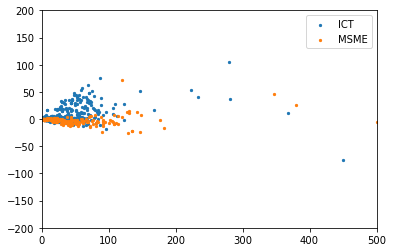

In [34]:
ICT_Professors = reduced_X[cleaned_papers_pdf['faculty']=='ICT_professor'] 
x,y = ICT_Professors.T
plt.scatter(x,y,s=5,label='ICT')
MSME_Professors = reduced_X[cleaned_papers_pdf['faculty']=='MSME']
x,y = MSME_Professors.T
plt.scatter(x,y,s=5,label='MSME')
plt.legend()
plt.xlim((0,500))
plt.ylim((-200,200))
plt.show()

In [27]:
cleaned_papers_pdf[cleaned_papers_pdf['cluster']==0]

,name,content,directory,isValid,faculty,cleaned_content,cluster
0,Banlue Srisuchinwong,"Thammasat Int. J. Sc. Tech., Vol.6, No.l, Janu...",../papers/ICT_professor/Banlue Srisuchinwong/1...,True,ICT_professor,thammasat int sc tech vol january april cmos c...,0
1,Banlue Srisuchinwong,___________________________________________0-7...,../papers/ICT_professor/Banlue Srisuchinwong/1...,True,ICT_professor,ieee low power low mismatch low glitch class a...,0
2,Banlue Srisuchinwong,This paper is a postprint of a paper submitted...,../papers/ICT_professor/Banlue Srisuchinwong/2...,True,ICT_professor,paper postprint paper submitted accepted publi...,0
3,Banlue Srisuchinwong,Electronic version of an article published as ...,../papers/ICT_professor/Banlue Srisuchinwong/2...,True,ICT_professor,electronic version article published journal c...,0
4,Banlue Srisuchinwong,PhysicsLettersA373(2009)4038–4043 Contentslist...,../papers/ICT_professor/Banlue Srisuchinwong/2...,True,ICT_professor,physicslettersa contentslistsavailableat scien...,0
5,Banlue Srisuchinwong,41UTCC Engineering Research Papers 2008A Low-P...,../papers/ICT_professor/Banlue Srisuchinwong/4...,True,ICT_professor,utcc engineering research paper low power high...,0
6,Banlue Srisuchinwong,1Improved Implementation of Sprott™s Chaotic O...,../papers/ICT_professor/Banlue Srisuchinwong/4...,True,ICT_professor,improved implementation sprott chaotic oscilla...,0
7,Banlue Srisuchinwong,Compound Structures of Six New Chaotic Attract...,../papers/ICT_professor/Banlue Srisuchinwong/5...,True,ICT_professor,compound structure six new chaotic attractor m...,0
8,Banlue Srisuchinwong,Int.J.Electron.Commun.(AEÜ)61(2007)307–313 www...,../papers/ICT_professor/Banlue Srisuchinwong/8...,True,ICT_professor,int electron commun ae www elsevier de aeue mh...,0
9,Banlue Srisuchinwong,International Journal of Engineering Research ...,../papers/ICT_professor/Banlue Srisuchinwong/a...,True,ICT_professor,international journal engineering research dev...,0


In [28]:
cleaned_papers_pdf['cluster'].value_counts()

0    770
5      4
3      2
1      2
9      1
8      1
7      1
6      1
4      1
2      1
Name: cluster, dtype: int64

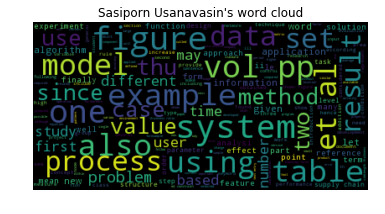

In [29]:
from wordcloud import WordCloud
def professor_wordCloud(name):
    text = ''
    professor_pdf = cleaned_papers_pdf[cleaned_papers_pdf['name']==name]
    for i,row in cleaned_papers_pdf.iterrows():
        text+=(row['cleaned_content']+"\n")
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(name+"'s word cloud")
    plt.show()
    
professor_wordCloud('Sasiporn Usanavasin')

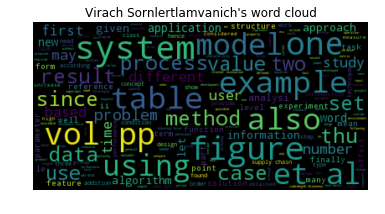

In [30]:
professor_wordCloud('Virach Sornlertlamvanich')

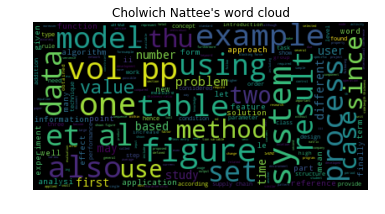

In [31]:
professor_wordCloud('Cholwich Nattee')